In [16]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
print(os.listdir("../input"))
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from sklearn.metrics import roc_curve, auc

from keras.callbacks import EarlyStopping  # Import EarlyStopping callback

# ... (The rest of the code remains the same as before)





['testtt', 'asl-alphabet', 'asl-alphabet-test', 'testtt2', 'my-testing']


In [17]:
train_dir = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

In [18]:
# setting up hyperparameters
import time

# Get the current timestamp
current_time = int(time.time())

# Set the seed using the current timestamp
seed = current_time

unique_labels =  ['N', 'R', 'space', 'B', 'I', 'del', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'nothing', 'J']


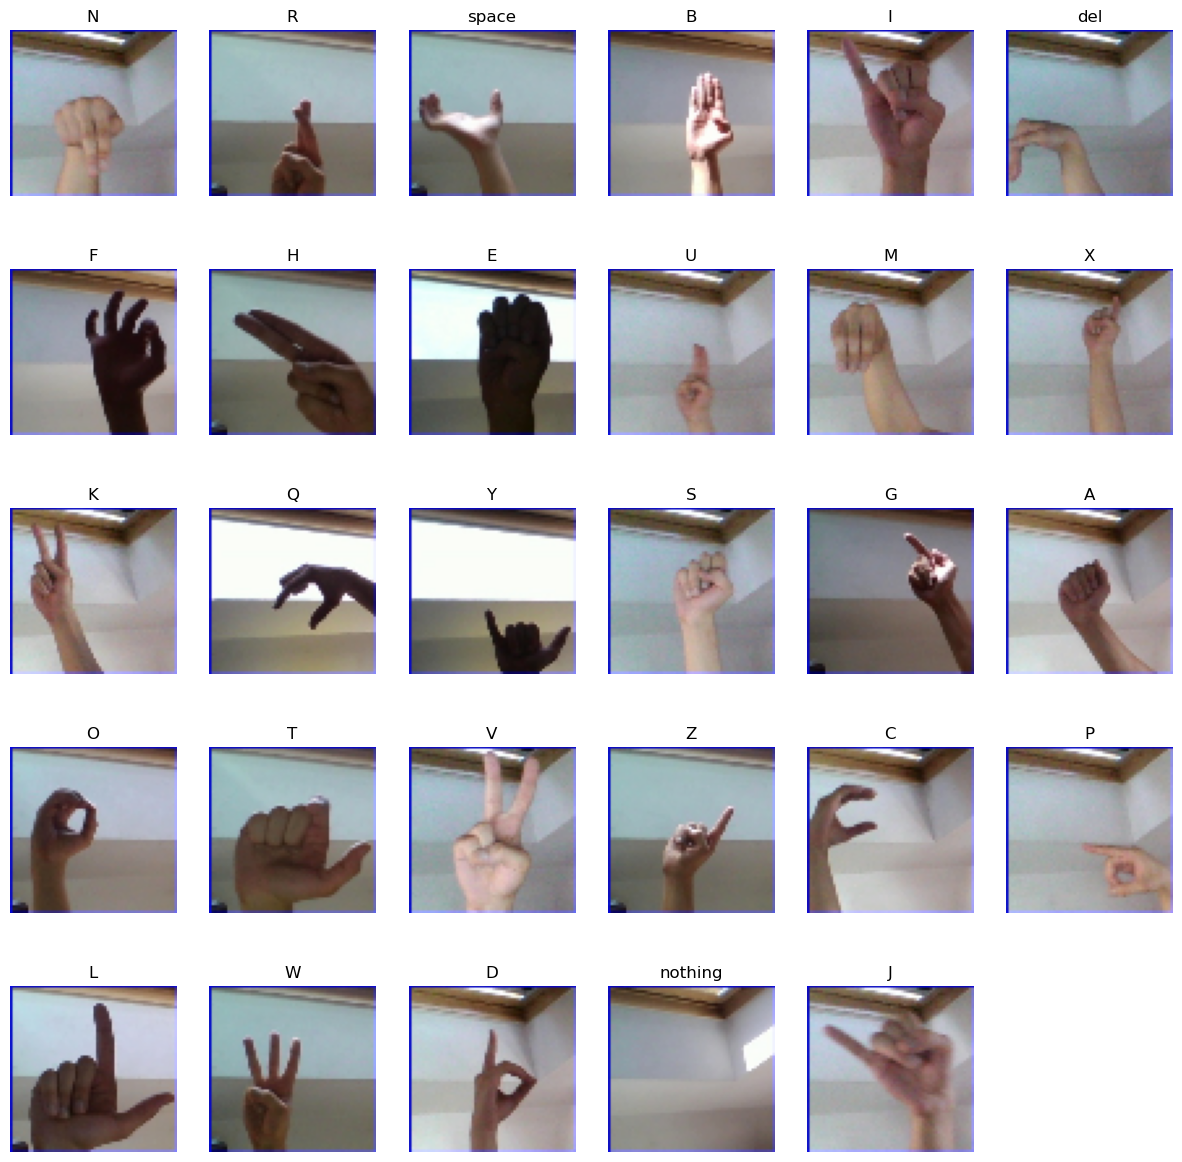

In [19]:
def load_unique():
    size_img = 64, 64
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)
fig = plt.figure(figsize=(15, 15))

def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1, (row * col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()
import os
import cv2
import numpy as np
import keras
from sklearn.model_selection import train_test_split

labels_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12,
               'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24,
               'Z': 25}

In [20]:
def load_data():
    images = []
    labels = []
    size = 64, 64
    print("LOADING DATA FROM : ", end="")
    for folder in os.listdir(train_dir):
        if folder in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
            print(folder, end=' | ')
            for image in os.listdir(train_dir + "/" + folder):
                temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
                temp_img = cv2.resize(temp_img, size)
                images.append(temp_img)
                labels.append(ord(folder) - ord('A'))

    images = np.array(images)
    images = images.astype('float32') / 255.0
    labels = keras.utils.to_categorical(labels, num_classes=26)

    # Reduce the training dataset to 50,000 samples
    total_samples = 50000
    images, _, labels, _ = train_test_split(images, labels, train_size=total_samples, stratify=labels, random_state=seed)

    X_train, X_temp, Y_train, Y_temp = train_test_split(images, labels, test_size=0.40, random_state=seed)
    X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.35, random_state=seed)

    print()
    print('Loaded', len(X_train), 'images for training,', 'Train data shape =', X_train.shape)
    print('Loaded', len(X_val), 'images for validation,', 'Validation data shape =', X_val.shape)
    print('Loaded', len(X_test), 'images for testing', 'Test data shape =', X_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [21]:
def create_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=[3, 3], padding='same', activation='relu', input_shape=(64, 64, 3)))
    model.add(Conv2D(32, kernel_size=[3, 3], padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=[3, 3]))

    model.add(Conv2D(32, kernel_size=[3, 3], padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=[3, 3], padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=[3, 3]))

    model.add(Conv2D(128, kernel_size=[3, 3], padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=[3, 3], padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=[3, 3]))

    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(26, activation='softmax'))
#     model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
 # Add Adam optimizer with learning rate = 0.00001
    optimizer = Adam(learning_rate=0.00001)
    model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

    print("MODEL CREATED")
    model.summary()

    return model

def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size=64, epochs=40, validation_data=(X_val, Y_val))
    return model_hist

In [22]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = load_data()

LOADING DATA FROM : N | R | B | I | F | H | E | U | M | X | K | Q | Y | S | G | A | O | T | V | Z | C | P | L | W | D | J | 
Loaded 30000 images for training, Train data shape = (30000, 64, 64, 3)
Loaded 13000 images for validation, Validation data shape = (13000, 64, 64, 3)
Loaded 7000 images for testing Test data shape = (7000, 64, 64, 3)


In [23]:
# Apply data augmentation to the training dataset
datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate images within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Randomly shift images horizontally within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Randomly shift images vertically within the range of [-0.1, 0.1] of the total height
    zoom_range=0.1,         # Randomly zoom images within the range of [0.9, 1.1]
    horizontal_flip=True,   # Randomly flip images horizontally
    vertical_flip=False,    # Do not flip images vertically
)

datagen.fit(X_train)

In [24]:
# from keras.optimizers import Adam  # Import Adam optimizer

# # Now, create the model, fit it using augmented data, and evaluate the model as before
# model = create_model()

# # Fit the model with augmented data
# curr_model_hist = model.fit(datagen.flow(X_train, Y_train, batch_size=64),
#                             steps_per_epoch=len(X_train) / 64,  # Number of batches per epoch
#                             epochs=40,
#                             validation_data=(X_val, Y_val))

In [27]:
# from keras.optimizers import Adam  # Import Adam optimizer
# model = create_model()

# # Fit the model (without EarlyStopping) and save the training history
# curr_model_hist = model.fit(datagen.flow(X_train, Y_train, batch_size=64),
#                             steps_per_epoch=len(X_train) / 64,  # Number of batches per epoch
#                             epochs=200,
#                             validation_data=(X_val, Y_val))

MODEL CREATED
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                      


KeyboardInterrupt



In [28]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [30]:
from keras.optimizers import Adam  # Import Adam optimizer
model = create_model()
    
# Fit the model with augmented data and use the EarlyStopping callback
curr_model_hist = model.fit(datagen.flow(X_train, Y_train, batch_size=64),
                            steps_per_epoch=len(X_train) / 64,  # Number of batches per epoch
                            epochs=200,
                            validation_data=(X_val, Y_val),
                            callbacks=[early_stopping])  # Add the EarlyStopping callback here

MODEL CREATED
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                    

In [31]:
# Evaluate the model on the entire testing dataset with batch_size=1
evaluate_metrics = model.evaluate(X_test, Y_test, batch_size=1)

print("\nTesting Accuracy = {:.2f}%".format(evaluate_metrics[1] * 100), "\nTesting Loss = {:.6f}".format(evaluate_metrics[0]))

7000/7000 [==============================] - 24s 3ms/step - loss: 0.4097 - accuracy: 0.9761

Testing Accuracy = 97.61% 
Testing Loss = 0.409724


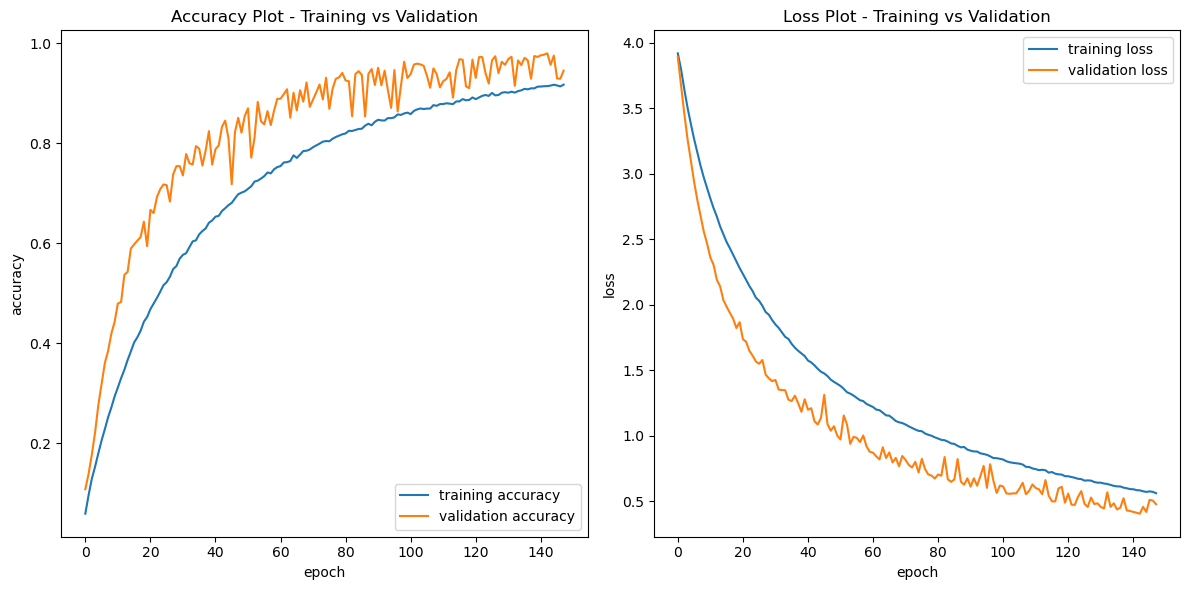

In [32]:
# Plot the accuracy and loss curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(curr_model_hist.history['accuracy'])
plt.plot(curr_model_hist.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.title('Accuracy Plot - Training vs Validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.title('Loss Plot - Training vs Validation')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.tight_layout()
plt.show()

219/219 [==============================] - 1s 4ms/step


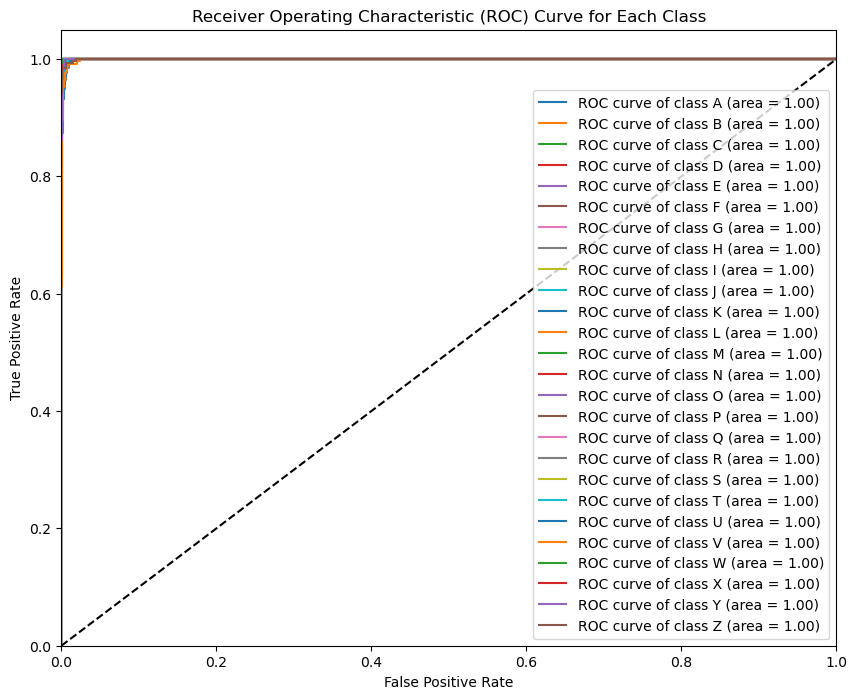

In [33]:
# Calculate the ROC curve for each class
y_pred_prob = model.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(26):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(26):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(chr(i + 65), roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

219/219 [==============================] - 1s 3ms/step

Total Misclassified Images:  167

F1 Scores:
Class A: 0.98
Class B: 0.98
Class C: 1.00
Class D: 0.99
Class E: 0.99
Class F: 0.99
Class G: 0.99
Class H: 1.00
Class I: 1.00
Class J: 1.00
Class K: 0.98
Class L: 1.00
Class M: 0.98
Class N: 0.98
Class O: 0.99
Class P: 1.00
Class Q: 1.00
Class R: 0.93
Class S: 0.96
Class T: 0.96
Class U: 0.93
Class V: 0.94
Class W: 0.95
Class X: 0.97
Class Y: 0.93
Class Z: 0.95

Precision Scores:
Class A: 0.99
Class B: 0.99
Class C: 1.00
Class D: 0.99
Class E: 0.99
Class F: 0.99
Class G: 0.99
Class H: 1.00
Class I: 1.00
Class J: 1.00
Class K: 0.98
Class L: 1.00
Class M: 0.99
Class N: 0.97
Class O: 0.98
Class P: 1.00
Class Q: 1.00
Class R: 0.94
Class S: 0.99
Class T: 0.97
Class U: 0.94
Class V: 0.95
Class W: 0.91
Class X: 0.97
Class Y: 0.86
Class Z: 1.00


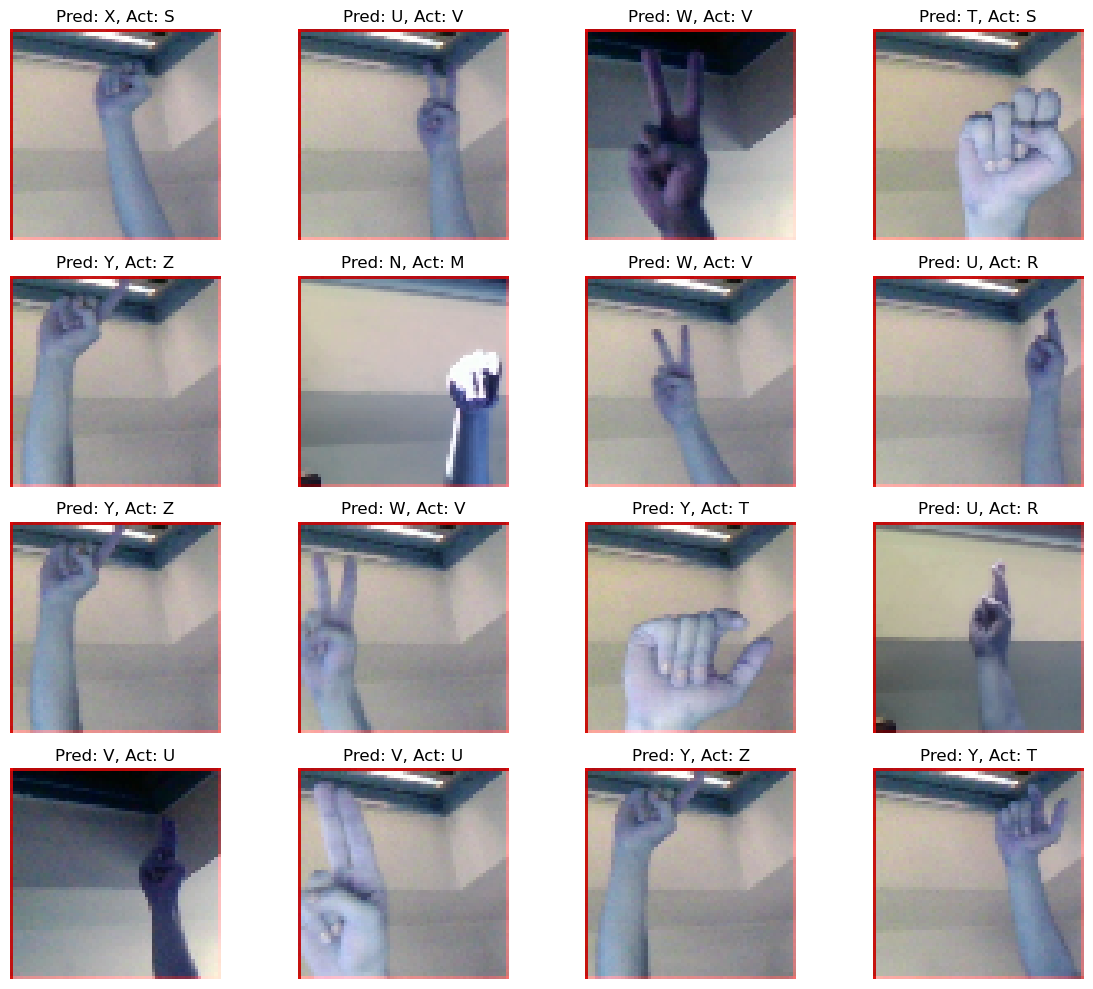

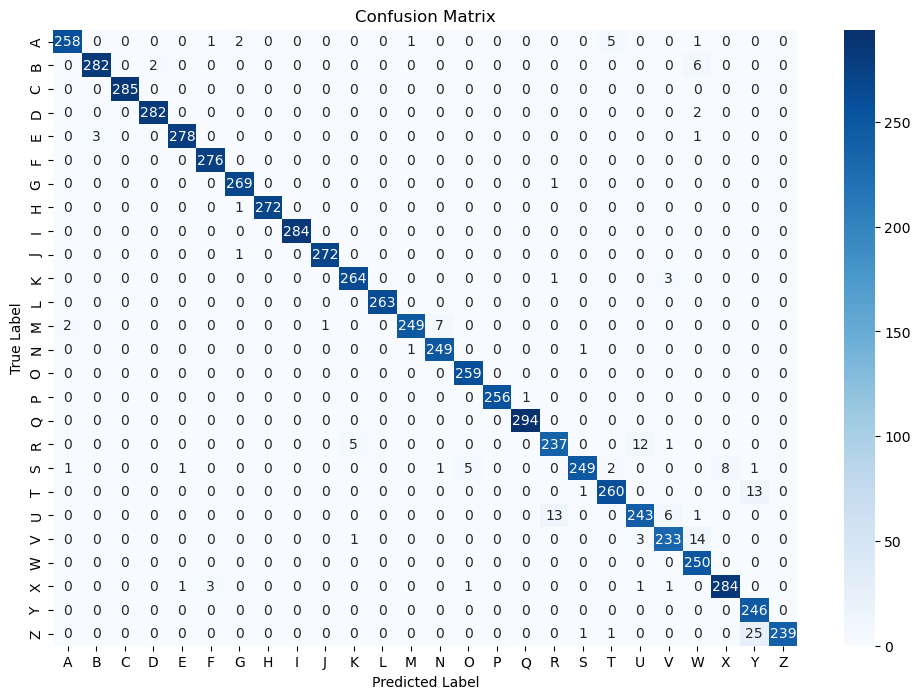

In [34]:
# Calculate the confusion matrix
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
misclassified_indices = np.where(np.argmax(Y_test, axis=1) != y_pred)[0]
conf_mat = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)

# Calculate F1 scores and precision for each class
f1_scores = f1_score(np.argmax(Y_test, axis=1), y_pred, average=None)
precision_scores = precision_score(np.argmax(Y_test, axis=1), y_pred, average=None)

# Print the total number of misclassified images
total_misclassified = len(misclassified_indices)
print("\nTotal Misclassified Images: ", total_misclassified)

# Print F1 scores and precision for each class
print("\nF1 Scores:")
for i in range(26):
    print("Class {}: {:.2f}".format(chr(i + 65), f1_scores[i]))

print("\nPrecision Scores:")
for i in range(26):
    print("Class {}: {:.2f}".format(chr(i + 65), precision_scores[i]))

# Plot the misclassified samples
plt.figure(figsize=(12, 10))
rows = 4
cols = 4
for i, index in enumerate(misclassified_indices[:rows * cols]):
    predicted_label = chr(y_pred[index] + 65)
    actual_label = chr(np.argmax(Y_test[index]) + 65)
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.imshow(X_test[index])
    plt.title(f"Pred: {predicted_label}, Act: {actual_label}")

plt.tight_layout()
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels_dict.keys(), yticklabels=labels_dict.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Calculate F1 scores and precision for each class
f1_scores = f1_score(np.argmax(Y_test, axis=1), y_pred, average=None)
precision_scores = precision_score(np.argmax(Y_test, axis=1), y_pred, average=None)

# Print the total number of misclassified images
total_misclassified = len(misclassified_indices)
print("\nTotal Misclassified Images: ", total_misclassified)

# Print F1 scores and precision for each class in a table
class_labels = [chr(i + 65) for i in range(26)]
data = {'Class Label': class_labels, 'F1 Score': f1_scores, 'Precision': precision_scores}
df_scores = pd.DataFrame(data)
print(df_scores)


Total Misclassified Images:  167
   Class Label  F1 Score  Precision
0            A  0.975425   0.988506
1            B  0.980870   0.989474
2            C  1.000000   1.000000
3            D  0.992958   0.992958
4            E  0.989324   0.992857
5            F  0.992806   0.985714
6            G  0.990792   0.985348
7            H  0.998165   1.000000
8            I  1.000000   1.000000
9            J  0.996337   0.996337
10           K  0.981413   0.977778
11           L  1.000000   1.000000
12           M  0.976471   0.992032
13           N  0.980315   0.968872
14           O  0.988550   0.977358
15           P  0.998051   1.000000
16           Q  0.998302   0.996610
17           R  0.934911   0.940476
18           S  0.957692   0.988095
19           T  0.959410   0.970149
20           U  0.931034   0.938224
21           V  0.941414   0.954918
22           W  0.952381   0.909091
23           X  0.974271   0.972603
24           Y  0.926554   0.863158
25           Z  0.946535   1.0

In [36]:
model.save('Custom CNN using data augmentation.h5')

219/219 [==============================] - 1s 3ms/step


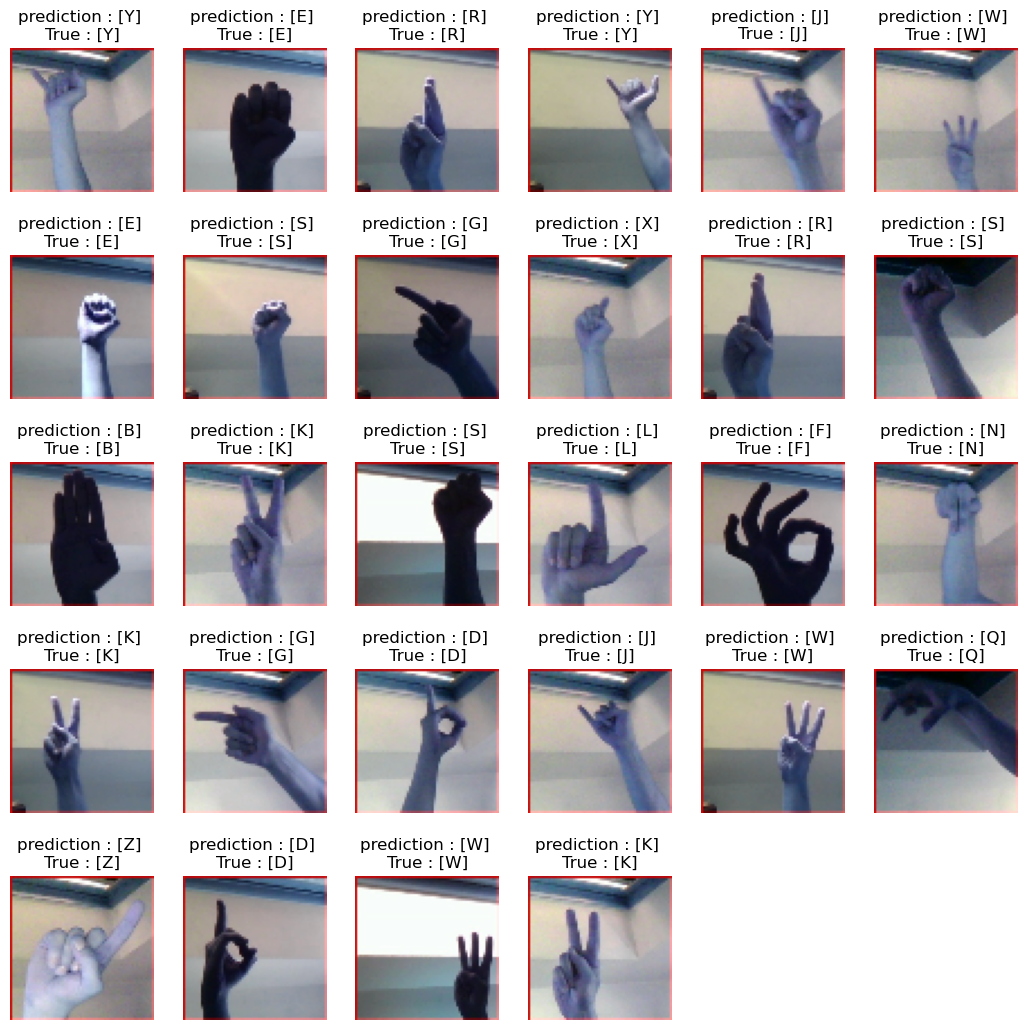

In [44]:
# Store test images, names, and model predictions
test_images = X_test
test_img_names = [chr(np.argmax(Y_test[i]) + 65) for i in range(len(Y_test))]
y_pred_prob = model.predict(X_test)
predictions = np.argmax(y_pred_prob, axis=1)
predictions_labels_plot = [chr(predictions[i] + 65) for i in range(len(predictions))]

# Plot test images and predictions
predfigure = plt.figure(figsize=(13, 13))
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    
    title = "prediction : [" + str(predictions_label) + "] " + "\n" + "True : [" + label + "]"
    plt.title(title)
    return

image_index = 0
row = 5
col = 6
for i in range(1, (row * col - 1)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()